# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importing necessary packages for data wrangling and analysis in this project
import pandas as pd
import numpy as np
import requests
import os
import re
#For gathering data from twitter API
import tweepy
import json
from timeit import default_timer as timer

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#using pandas read function to read the file on hand(Enhanced twitter archive) into a dataframe "we rate dogs" -WRD. This file was downloaded manually.

WRD_df=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Displaying first five rows
WRD_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Displaying last five rows
WRD_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
#Using request library to download image-predictions.tsv file programmatically

# Creating a folder to store the downloaded file
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
# creating the request
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

In [8]:
# Checking the status code of the response
response.status_code

200

In [9]:
#Saving the downloaded file into the newly created folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [10]:
# To check if the file was sucessfully stored in the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [11]:
#Lets read the downloaded tsv file into a dataframe
imagepred_df=pd.read_csv('./image_predictions/image-predictions.tsv',sep='\t')

In [12]:
# Displaying first and last rows of the dataframe
imagepred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
imagepred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
# Defining my access keys for twitter

consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [15]:
# Testing the api with one tweet id
sample_tweet= api.get_status(WRD_df.tweet_id[0], tweet_mode='extended')
sample_tweet

Status(_api=<tweepy.api.API object at 0x7fa2fad9de80>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

In [16]:
print(sample_tweet.full_text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [17]:
#Assigning the tweet ids needed to gather data to a variable
arch_tweet_id= WRD_df.tweet_id.values
len(arch_tweet_id)

2356

In [18]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
missing_tweet_ids = [] #For errors that might occur

start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 30-35 min to run 
    for tweet_id in arch_tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended',
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            print("Success")
            
            json.dump(tweet._json, outfile) #converting each tweet status to a JSON object
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            missing_tweet_ids.append(tweet_id)
            pass
        
        
end = timer()
print('Total data gathering  duration is {} min'.format(
        (end - start)/60))
print(missing_tweet_ids)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Rate limit reached. Sleeping for: 745
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Succe

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [19]:
len(missing_tweet_ids)

29

In [20]:
tweet_list=[]

# loading the txt file
with open('tweet_json.txt','r', encoding='utf-8') as file:
    for line in file:
        tweet=json.loads(line)
        
        #providing the required parameters to append to tweet_list
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        tweet_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})

In [21]:
tweet_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 6969,
  'favorite_count': 33697},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5272,
  'favorite_count': 29222},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3464,
  'favorite_count': 21978},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7191,
  'favorite_count': 36791},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7717,
  'favorite_count': 35182},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2586,
  'favorite_count': 17749},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1647,
  'favorite_count': 10331},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15679,
  'favorite_count': 56669},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3604,
  'favorite_count': 24427},
 {'tweet_id': 890240255349198849,
  'retweet_count': 6068,
  'favorite_count': 27848},
 {'tweet_id': 890006608113172480,
  'retweet_count': 6111,
  'favorite_count': 26947},
 {'tweet_id': 889880896479866881,
  'retwe

In [22]:
len(tweet_list)

2327

In [23]:
missing_tweet_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 856330835276025856,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [24]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to tweet_list
missing_tweet_list = []
for tweet_id in missing_tweet_ids:
    try:
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        missing_tweet_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        missing_tweet_list.append(e)

In [25]:
len(missing_tweet_list)

29

In [26]:
missing_tweet_list

[{'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favorite_count': 2283},
 {'tweet_id': 666020888022790149,
  'retweet_count': 419,
  'favo

In [27]:
# Create a dataframe from the tweet_list dictionary
column_names=['tweet_id','retweet_count','favorite_count']
tweet_df=pd.DataFrame(tweet_list,columns=column_names)

In [28]:
# A glance of the dataframe
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33697
1,892177421306343426,5272,29222
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35182


In [29]:
# Save the new dataframe as a csv file for easy usage and assessment.
tweet_df.to_csv('tweet_wrd.csv', encoding = 'utf-8', index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



###  Inspection of the 3 gathered dataset based on Quality and Tidiness issues.This will be done in 2 ways:
>    1. Visual Assessment
>    2. Programmatic Assessment
    

#### Points to Note
* The original ratings (no retweets) that have images are needed.
* To assess and clean at least-
>- 8 Quality Issues
>- 2 Tidiness Issues

In [30]:
pd.set_option('display.max_column', 300)

pd.set_option('display.max_colwidth', 300)

### Visual Assessment

#### A1. Twitter Enhanced Archive(WRD_df)

In [31]:
#scrolling through the dataframe to assess visually
WRD_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

> Visual Inspection results- 
1. Some columns containing null values(NaN)
2. The source contains an Html formatted string instead of the name of the utility used to post the tweet
3. The name column contains incorrect information such as a,None,an,the etc and all starting with lower cases.
4. The table contains retweet as shown in tweet id-888202515573088257
5. The text column contains the rating numerator/denominator and urls

#### B1-Image Predictions(imagepred_df)

In [32]:
#scrolling through the dataframe to assess visually
imagepred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


> Visual Inspection results- 
1. There are some strange values in the p1,p2 and p3 columns such as “orange, boxer,cardigan, car_wheel, can_opener”e.t.c , these cells must be checked first then deleted if not needed.


#### C1- Data From Twittwer API(tweet_df)

In [33]:
tweet_wrd_df=pd.read_csv('tweet_wrd.csv')

In [34]:
#scrolling through the dataframe to assess visually
tweet_wrd_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33697
1,892177421306343426,5272,29222
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35182
5,891087950875897856,2586,17749
6,890971913173991426,1647,10331
7,890729181411237888,15679,56669
8,890609185150312448,3604,24427
9,890240255349198849,6068,27848


> Visual Inspection results- 
1. No issues detected

### Programmatic Assessment

#### A2. Twitter Enhanced Archive(WRD_df)

In [35]:
WRD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [36]:
retweets=WRD_df.loc[WRD_df.retweeted_status_id.notnull()]
print(retweets.shape)
retweets

(181, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [37]:
#Descriptive statistics for the Numerical columns
WRD_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [38]:
WRD_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [39]:
WRD_df.query('rating_numerator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [40]:
WRD_df.query('rating_numerator==1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [41]:
WRD_df.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [42]:
WRD_df.query('rating_denominator==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


>From the text column the correct rating is 13/10 i.e numerator=13 and denominator=10

In [43]:
#Checking for numerators with decimals.
WRD_df[WRD_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


> improper extraction of the rating numerators where it has decimals

In [44]:
#Check for duplicates
sum(WRD_df.duplicated())

0

In [45]:
WRD_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
#Further confirming the visual inspection results using regex
lower_case_names = WRD_df.name.str.contains('^[a-z]',regex=True)
WRD_df[lower_case_names].name.value_counts().sort_index(ascending=True)

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [47]:
wrong_names=WRD_df[lower_case_names].name
len(wrong_names)

109

> Programmatic Assessment results- 

> Quality issues
1. Some columns containing null values such as expanded_urls,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp.
2. The timestamp datatype is object instead of datetime and the tweet_id is int instead of string.
3. The table contains 181 retweet as shown in retweeted_status_id.
4. The source contains 4 unique values which cant be easily read due to the HTML structure
5. The rating numerator and denominator contains zero values and certain incorrect values when they are decimals
6. Null Values recorded as None as seen in name column
7. The dog name is floof instead of floofer shown in columns.


> Tidiness Issues
1. Dog stages is represented in four columns.It is better to create one column for dog stages that contains the values (doggo, floofer, pupper and puppo).

#### B2. Image Predictions(imagepred_df)

In [48]:
imagepred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
imagepred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [50]:
imagepred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
imagepred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [52]:
sum(imagepred_df.duplicated())

0

In [53]:
imagepred_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [54]:
imagepred_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [55]:
imagepred_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

> From the value counts above, the table contains predictions that are not dogs as shown as false.

In [56]:
imagepred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
1302,752917284578922496,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,1,German_shepherd,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False


> Programmatic Assessment results- 

> Quality issues
1. The tweet id is an integer instead of a string.
2. The table contains only 2075 rows hence others are considerd missing.
3. The columns names are not descriptive.
4. Some non-dogs information represented in the table
5. Inconsistency in the dog breed names, some starting with lowercase and some with upper case


> Tidiness Issues
1. The prediction,confidence and dog represented in 3 columns each.

#### C2.Twitter API data (tweet_wrd_df)

In [57]:
tweet_wrd_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33697
1,892177421306343426,5272,29222
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35182


In [58]:
tweet_wrd_df.tail()

,tweet_id,retweet_count,favorite_count
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,419,2283


In [59]:
tweet_wrd_df.sample(15)

,tweet_id,retweet_count,favorite_count
1852,675003128568291329,406,1388
51,882045870035918850,4066,25627
45,883360690899218434,3061,19879
1435,694669722378485760,13051,32944
112,870308999962521604,3534,19420
1105,728751179681943552,614,2534
1441,694183373896572928,842,2704
372,826240494070030336,2410,12488
1089,732375214819057664,2274,7415
2168,668826086256599040,112,382


In [60]:
tweet_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [61]:
tweet_wrd_df.nunique()

tweet_id          2327
retweet_count     1636
favorite_count    1977
dtype: int64

In [62]:
sum(tweet_wrd_df.tweet_id.duplicated())

0

In [63]:
tweet_wrd_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2458.731414,7026.817791
std,6.820795e+16,4163.862226,10920.129223
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3038.000000
75%,7.986547e+17,2845.000000,8565.000000
max,8.924206e+17,70334.000000,144247.000000


> Programmatic Assessment results- 

> Quality issues
1. The tweet id is an integer instead of a string.
2. The table contains only 2327 rows hence others are considerd missing.



> Tidiness Issues
1. The dataset is tidy.

### Quality issues Summary
**Twitter Archive**

1.  The table contains 181 retweet as shown in retweeted_status_id.
2.  Null Values recorded as None as seen in name column
3.  Erroneous datatypes for tweet_id,timestamp,rating_numerator and denominator.
4.  The dog stage name is floof instead of floofer shown in columns
5.  The rating numerator and denominator contains zero values and certain incorrect values when they are decimals
6.  Some columns containing null values such as retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp which needs to be dropped if not needed for analysis
7.  The source contains an Html formatted string instead of the name of the utility used to post the tweet
8.  The name column contains incorrect information such as a,None,an,the etc and all starting with lower cases
9.  Some rows in expanded-url column has more than one url

**Image Predictions**

10. The tweet id is an integer instead of a string.
11. The image prediction table contains only 2075 rows hence others are considerd missing.
12. The image predictions columns names are not descriptive.
13. There are some strange values in the p1,p2 and p3 columns such as “orange, boxer,cardigan, car_wheel, can_opener”e.t.c , these cells must be checked first then deleted if not needed.
14. Inconsistency in the dog breed names, some starting with lowercase and some with upper case


### Tidiness issues
1. Dog stages is represented in four columns.It is better to create one column for dog stages that contains the values (doggo, floofer, pupper and puppo).
2. The prediction,confidence and dog represented in 3 columns each
3. The three dataset all has information related to rating dogs hence merging is required.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [64]:
# Make copies of original pieces of data
wrd_clean=WRD_df.copy()
imagepred_clean= imagepred_df.copy()
tweetwrd_clean= tweet_wrd_df.copy()

### Issue #1: Only original tweets is required

#### Define: 
Extract the original tweets from the twitter achive table by creating a dataframe where retweeted_status_id is null

#### Code

In [65]:
# Retrieve only original tweets, i.e. retweeted_status_id is Null
wrd_clean = wrd_clean[wrd_clean.retweeted_status_id.isnull()]


# Reset index
wrd_clean.reset_index(drop = True, inplace = True)

#### Test

In [66]:
# Check if the retweets observations are still in the dataset
assert wrd_clean.retweeted_status_id.isnull().all() == True

In [67]:
wrd_clean[wrd_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [68]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2 & 3: Unify representation of Null values as Nan,Replace Floofer column name to Floof

#### Define- 

- Using the numpy function, replace all null values entered as None to Nan
- Replace the wrong column name floofer with floof

#### Code

In [69]:
# Replacing none values with nan
wrd_clean.replace('None', np.nan, inplace=True)

In [70]:
# Renaming floofer to floof
wrd_clean.rename(columns={'floofer':'floof'}, inplace =True)

#### Test

In [71]:
#Checking for None in the name column
'None' in wrd_clean.name.values

False

In [72]:
#Checking the column names for floofer
'floofer'in list(wrd_clean)

False

In [73]:
list(wrd_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #4: Columns not necessary for the analysis-Quality

#### Define:
Using the pandas drop function to drop all columns not needed for the analysis as they contain majorly null values

#### Code

In [74]:
#Assign the columns to drop to a variable and drop them
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

wrd_clean.drop(drop_columns, axis = 1, inplace=True)

#### Test

In [75]:
# Check if columns are dropped
assert wrd_clean.columns.any() not in drop_columns

In [76]:
# columns names
list(wrd_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #5: The rating numerator and denominator contains zero values and certain incorrect values when they are decimals-Quality

#### Define:
Convert the rating_numerator and denominator datatype to float and extract the rating numerators and denominators using regex

#### Code

In [77]:
wrd_clean['rating_numerator']=wrd_clean['rating_numerator'].astype('float')
wrd_clean['rating_denominator']=wrd_clean['rating_denominator'].astype('float')

In [78]:
wrd_clean['rating_numerator']= wrd_clean.text.str.extract('(\d+\.?\d+|\d+)\/(\d+\.?\d+|\d+)', 
                               expand=True)[0]


In [79]:
wrd_clean['rating_denominator']=wrd_clean.text.str.extract('(\d+\.?\d+|\d+)\/(\d+\.?\d+|\d+)', 
                               expand=True)[1]

In [80]:
wrd_clean[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


#### Test

In [81]:
wrd_clean[wrd_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


In [82]:
wrd_clean[['rating_numerator','rating_denominator']].loc[45,:]

rating_numerator      13
rating_denominator    10
Name: 45, dtype: object

### Issue #5:The prediction,confidence and dog represented in 3 columns each-Tidiness

#### Define:

- Remove the row with non-dog breed prediction (that is all false for p1, p2, & p3). 
- Melt the individual P1,P2 and P3 columns into prediction number and dog breed.
- Melt the individual confidence columns to a single confidence column
- Discard the p1_dog,p2_dog and p3_dog as this are all true
- Deal with the inconsitency in dog breed structure by capitalizing all dog breed.

#### Code

In [83]:
# Mask for p1, p2, p3 dog prediction
mask_1 = imagepred_clean['p1_dog'] == True
mask_2 = imagepred_clean['p2_dog'] == True
mask_3 = imagepred_clean['p3_dog'] == True

In [84]:
# check for total number of dog breed predictions
imagepred_clean=imagepred_clean[mask_1 & mask_2 & mask_3]
imagepred_clean.shape

(1243, 12)

In [85]:
imagepred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752,True,Appenzeller,0.158463,True,EntleBucher,0.148115,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True


lets iterates the melting process for the three categories of columns: prediction, dog breed and confidence

In [86]:
# create 'prediction' and 'dog_breed' columns
imagepred_clean = pd.melt(imagepred_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog','p2_conf','p2_dog','p3_conf', 'p3_dog'],
var_name = 'prediction',value_name = 'dog_breed')

In [87]:
# create 'confidence' column
imagepred_clean = pd.melt(imagepred_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num','p1_dog','p2_dog','p3_dog','prediction','dog_breed'],
                          var_name = 'prediction2',value_name = 'confidence')


In [88]:
imagepred_clean.sample(10)

,tweet_id,jpg_url,img_num,p1_dog,p2_dog,p3_dog,prediction,dog_breed,prediction2,confidence
10802,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,True,True,True,p3,standard_poodle,p3_conf,0.133534
8181,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,True,True,True,p1,Shih-Tzu,p3_conf,0.008072
2265,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/821149477142556673/pu/img/88_DV098c60pC5AA.jpg,1,True,True,True,p2,malinois,p1_conf,0.515933
7731,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,True,True,True,p1,Boston_bull,p3_conf,0.002302
8390,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,True,True,True,p1,Labrador_retriever,p3_conf,0.012061
5723,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,True,True,True,p2,beagle,p2_conf,0.145358
9416,749395845976588288,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,1,True,True,True,p2,chow,p3_conf,0.003784
1973,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg,1,True,True,True,p2,Afghan_hound,p1_conf,0.714409
3403,799063482566066176,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,2,True,True,True,p3,Australian_terrier,p1_conf,0.334436
1018,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,True,True,True,p1,West_Highland_white_terrier,p1_conf,0.872064


In [89]:
imagepred_clean.shape

(11187, 10)

In [90]:
# Remove new duplicated rows
imagepred_clean = imagepred_clean[imagepred_clean['prediction'] == imagepred_clean['prediction2'].str[:2]]

In [91]:
imagepred_clean.shape

(3729, 10)

In [92]:
#drop unncecessary columns
columns_drop=['p1_dog','p2_dog','p3_dog','prediction2']
imagepred_clean.drop(columns_drop, axis = 1, inplace=True)

In [93]:
# remove 'p' from prediction
imagepred_clean['prediction'] = imagepred_clean['prediction'].str[1]

In [94]:
#capitalize the dog breed names
imagepred_clean['dog_breed'] = [name.capitalize() for name in imagepred_clean.dog_breed]

In [95]:
imagepred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3729 entries, 0 to 11186
Data columns (total 6 columns):
tweet_id      3729 non-null int64
jpg_url       3729 non-null object
img_num       3729 non-null int64
prediction    3729 non-null object
dog_breed     3729 non-null object
confidence    3729 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.9+ KB


In [96]:
type(imagepred_clean['prediction'][0])

str

In [97]:
# As observed in the original dataset,confidence value is already in sorted order, p1_conf > p2_conf > p3_conf

#creating a dataframe where prediction=1(i.e the highest confidence level)-to eliminate duplication of tweet_id

imagepred_clean2=imagepred_clean[imagepred_clean['prediction']=='1']

#### Test

In [98]:
imagepred_clean2.head(20)

,tweet_id,jpg_url,img_num,prediction,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,1,Bernese_mountain_dog,0.651137
6,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,1,Miniature_poodle,0.201493
7,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,1,Golden_retriever,0.775930
8,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,1,Gordon_setter,0.503672
9,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,1,Walker_hound,0.260857


In [99]:
imagepred_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 6 columns):
tweet_id      1243 non-null int64
jpg_url       1243 non-null object
img_num       1243 non-null int64
prediction    1243 non-null object
dog_breed     1243 non-null object
confidence    1243 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 68.0+ KB


### Issue #6: Dog stages is represented in four columns.It is better to create one column for dog stages that contains the values (doggo, floofer, pupper and puppo)-Tidiness

#### Define:
- Using the lambda function, join all individual columns to create a single column-dog_stages
- Drop the old columns

#### Code

In [100]:
wrd_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
1804,672964561327235073,2015-12-05 02:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Terry. He's a Toasty Western Sriracha. Doubles as a table. Great for parties. 10/10 would highly recommend https://t.co/1ui7a1ZLTT,https://twitter.com/dog_rates/status/672964561327235073/photo/1,10,10,Terry,NaN,NaN,NaN,NaN
221,843856843873095681,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,https://twitter.com/dog_rates/status/843856843873095681/photo/1,12,10,Sadie,NaN,NaN,NaN,NaN
1507,681610798867845120,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*collapses* 12/10 https://t.co/C7M8mnzHIK,https://twitter.com/dog_rates/status/681610798867845120/photo/1,12,10,NaN,NaN,NaN,NaN,NaN
916,736736130620620800,2016-05-29 01:49:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chadrick. He's gnarly af 13/10 https://t.co/447tyBN0mW,https://twitter.com/dog_rates/status/736736130620620800/photo/1,13,10,Chadrick,NaN,NaN,NaN,NaN
306,829141528400556032,2017-02-08 01:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Malcolm. He goes from sneaky tongue slip to flirt wink city in a matter of seconds. 12/10 would hug softly https://t.co/rHwfySggqR,"https://twitter.com/dog_rates/status/829141528400556032/photo/1,https://twitter.com/dog_rates/status/829141528400556032/photo/1",12,10,Malcolm,NaN,NaN,NaN,NaN


In [101]:
#Replacing nan in these columns with blanks
wrd_clean=wrd_clean.replace(np.nan, '', regex=True)

In [102]:
wrd_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,


In [103]:
#using lambda to merge the four columns into one

wrd_clean['dog_stages'] = wrd_clean[['doggo', 'floof', 'pupper', 'puppo']].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [104]:
wrd_clean['dog_stages'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

Replacing 'floofer' with the correct dog stage 'floof' and separating the stages that have more than one with hyphen(-)

In [105]:
wrd_clean['dog_stages'].mask(wrd_clean['dog_stages'] == 'floofer', 'floof', inplace=True)
wrd_clean['dog_stages'].mask(wrd_clean['dog_stages'] == 'doggopuppo', 'doggo-puppo', inplace=True)
wrd_clean['dog_stages'].mask(wrd_clean['dog_stages'] == 'doggofloofer', 'doggo-floof', inplace=True)
wrd_clean['dog_stages'].mask(wrd_clean['dog_stages'] == 'doggopupper', 'doggo-pupper', inplace=True)

In [106]:
# Replacing ''  with nan
wrd_clean.replace('', np.nan, inplace=True)

In [107]:
#drop unncecessary columns
columns_drop=['doggo','floof','pupper','puppo']
wrd_clean.drop(columns_drop, axis = 1, inplace=True)

#### Test

In [108]:
wrd_clean['dog_stages'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floof', 'doggo-puppo',
       'doggo-floof', 'doggo-pupper'], dtype=object)

In [109]:
wrd_clean['dog_stages'].value_counts()

pupper          224
doggo            75
puppo            24
doggo-pupper     10
floof             9
doggo-floof       1
doggo-puppo       1
Name: dog_stages, dtype: int64

In [110]:
wrd_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1063,712065007010385924,2016-03-21 23:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chester. He's clearly in charge of the other dogs. Weird ass paws. Not fit for fetch. 6/10 would still pet https://t.co/o2GvskrhHt,https://twitter.com/dog_rates/status/712065007010385924/photo/1,6,10,Chester,NaN
216,844973813909606400,2017-03-23 18:07:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Brady. He's a recovering alcoholic. Demonstrating incredible restraint here. 12/10 don't give pup, don't give in, Brady https://t.co/B1iBuSq3hr",https://twitter.com/dog_rates/status/844973813909606400/photo/1,12,10,Brady,NaN
714,760539183865880579,2016-08-02 18:14:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Atlas. Swinging is his passion. 12/10 would push all day https://t.co/9k8LLjJ0uJ,"https://twitter.com/dog_rates/status/760539183865880579/photo/1,https://twitter.com/dog_rates/status/760539183865880579/photo/1,https://twitter.com/dog_rates/status/760539183865880579/photo/1",12,10,Atlas,NaN
1461,684147889187209216,2016-01-04 23:02:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Sweets the English Bulldog. Waves back to other bikers. 12/10 just a fantastic friendly pupper https://t.co/WYiFzuX7D4,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,pupper
705,761672994376806400,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,https://twitter.com/dog_rates/status/761672994376806400/video/1,10,10,NaN,NaN


### Issue #7: The name column contains incorrect information such as a,None,an,the etc and all starting with lower cases

#### Define: 
From programmatic assessment above,these entries are incorrect names thus replace with null.

#### Code

In [111]:
#lets check out a sample
wrd_clean[wrd_clean.name=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
53,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,pupper
524,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,NaN
647,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,NaN
827,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,NaN
829,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,NaN
841,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,NaN
871,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,pupper
1015,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,NaN
1029,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10,10,a,NaN
1161,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,htt

In [112]:
wrd_clean.name=wrd_clean.name.mask(wrd_clean.name.str.islower().fillna(False))

#### Test

In [113]:
wrd_clean[wrd_clean.name=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages


In [114]:
wrd_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


### Issue #8: The source contains an Html formatted string instead of the name of the utility used to post the tweet

#### Define:
Replace the Html entries in the source column with the text contents of the html,i.e Twitter for iphone etc.

#### Code

In [115]:
#lets extract the unique values of the source colums

wrd_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [116]:
#Assigning each value to a different variable  
s1 = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
s2 = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
s3 = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
s4 = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [117]:
# Replacing the source with only the text content
wrd_clean.source.replace(s1, 'Twitter for iPhone', inplace=True)
wrd_clean.source.replace(s2, 'Twitter Web Client', inplace=True)
wrd_clean.source.replace(s3, 'Vine - Make a Scene', inplace=True)
wrd_clean.source.replace(s4, 'TweetDeck', inplace=True)

#### Test

In [118]:
wrd_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #9: The three dataset all has information related to rating dogs hence merging is required

#### Define:
- Using pandas merge to merge the 3 datasets on tweet_id

#### Code

In [119]:
#lets check the shape of each dataset
wrd_clean.shape

(2175, 9)

In [120]:
imagepred_clean2.shape

(1243, 6)

In [121]:
tweetwrd_clean.shape

(2327, 3)

In [122]:
#using inner merge to get dataframe where the tweet_id appears across the datasets
merged_df=pd.merge(pd.merge(wrd_clean,imagepred_clean2,how='inner',on='tweet_id'),tweetwrd_clean,how='inner',on='tweet_id')

#### Test

In [123]:
merged_df.shape

(1196, 16)

In [124]:
merged_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,prediction,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,5272,29222
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,3464,21978
2,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,7717,35182
3,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,1,Pomeranian,0.566142,15679,56669
4,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,1,Irish_terrier,0.487574,3604,24427
5,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,1,Pembroke,0.511319,6068,27848
6,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,1,Samoyed,0.957979,6111,26947
7,889665388333682689,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,NaN,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,1,Pembroke,0.966327,8302,41878
8,889638837579907072,2017-07-25 00:10:02 +0000,Twitter for iPhone,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",12,10,Ted,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,1,French_bulldog,0.991650,3700,23580
9,889531135344209921,2017-07-24 17:02:04 +0000,Twitter for iPhone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #

In [125]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 16 columns):
tweet_id              1196 non-null int64
timestamp             1196 non-null object
source                1196 non-null object
text                  1196 non-null object
expanded_urls         1196 non-null object
rating_numerator      1196 non-null object
rating_denominator    1196 non-null object
name                  845 non-null object
dog_stages            189 non-null object
jpg_url               1196 non-null object
img_num               1196 non-null int64
prediction            1196 non-null object
dog_breed             1196 non-null object
confidence            1196 non-null float64
retweet_count         1196 non-null int64
favorite_count        1196 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 158.8+ KB


In [126]:
sum(merged_df.duplicated())

0

In [127]:
merged_df.tweet_id.nunique()

1196

### Issue #10: Some rows in expanded-url column has more than one url

#### Define:
- Check if the urls are duplicated,if so remove otherwise keep both.

#### Code

In [128]:
# Check if any row has url more than once
merged_df.expanded_urls.apply(lambda x : len(x.split(','))).value_counts()

1    846
2    193
3     80
4     70
5      7
Name: expanded_urls, dtype: int64

In [129]:
# create empty list
expanded_url = []

# function to remove the additional url for rows having more than one url, if they are same
def drop_url(row):
    url= row.expanded_urls.split(',')  # split the url 
    url_set = set(url) # set returns uniques elements
    
    # Convert set into comma separated string
    url_str = ",".join(url_set)
    # append the url str
    expanded_url.append(url_str)
            
        
# call function using pandas apply by columns
merged_df.apply(drop_url, axis=1)

# add lists created to master dataframe
merged_df.expanded_urls = expanded_url    

#### Test

In [130]:
# Check if any row has url more than once
merged_df.expanded_urls.apply(lambda x : len(x.split(','))).value_counts()

1    1173
2      23
Name: expanded_urls, dtype: int64

We have 28 rows having 2 different urls

### Issue #11:Erroneous datatypes

#### Define:
- convert timestamp to datetime datatype
- convert tweet_id to string 
- convert dog_stages and dog_breed to category datatype
- convert rating_numerator and denominator to float

#### Code

In [131]:
# Convert datatype of timestamp column to timestamp
merged_df.timestamp = pd.to_datetime(merged_df.timestamp)

In [132]:
# Convert datatype of tweet_id to str
merged_df.tweet_id = merged_df.tweet_id.astype(str)

In [133]:
# Convert datatype of dog stages and dog_breed to category
merged_df.dog_stages = merged_df.dog_stages.astype('category')
merged_df.dog_breed = merged_df.dog_breed.astype('category')

In [134]:
# Convert datatype of rating_numerator and denominator to float
merged_df['rating_numerator']=wrd_clean['rating_numerator'].astype('float')
merged_df['rating_denominator']=wrd_clean['rating_denominator'].astype('float')

#### Test

In [135]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 16 columns):
tweet_id              1196 non-null object
timestamp             1196 non-null datetime64[ns]
source                1196 non-null object
text                  1196 non-null object
expanded_urls         1196 non-null object
rating_numerator      1196 non-null float64
rating_denominator    1196 non-null float64
name                  845 non-null object
dog_stages            189 non-null category
jpg_url               1196 non-null object
img_num               1196 non-null int64
prediction            1196 non-null object
dog_breed             1196 non-null category
confidence            1196 non-null float64
retweet_count         1196 non-null int64
favorite_count        1196 non-null int64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 148.7+ KB


In [136]:
merged_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,prediction,dog_breed,confidence,retweet_count,favorite_count
1126,667902449697558528,2015-11-21 03:08:47,Twitter for iPhone,This is Cleopatricia. She is a northern Paperback Maple. Set up hammock somehow. 9/10 would chill in hammock with https://t.co/sJeHdGUt0W,https://twitter.com/dog_rates/status/667902449697558528/photo/1,10.0,10.0,Cleopatricia,NaN,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,1,Norwegian_elkhound,0.298881,334,755
460,753026973505581056,2016-07-13 00:43:15,Twitter for iPhone,Say hello to Tayzie. She's a Barbadian Bugaboop. Seems quite social. A rare quality for a Bugaboop. 10/10 petable af https://t.co/6qF5YZx6OV,https://twitter.com/dog_rates/status/753026973505581056/photo/1,13.0,10.0,Tayzie,NaN,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,1,Pembroke,0.868511,874,3641
1132,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,12.0,10.0,Kial,NaN,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,1,Pomeranian,0.412893,456,760
790,687807801670897665,2016-01-15 01:25:33,Twitter for iPhone,Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy,https://twitter.com/dog_rates/status/687807801670897665/photo/1,12.0,10.0,Trooper,NaN,https://pbs.twimg.com/media/CYuVi9pWwAAbOGC.jpg,1,1,Staffordshire_bullterrier,0.151113,656,2196
556,727524757080539137,2016-05-03 15:46:33,Twitter for iPhone,This pupper had to undergo emergency haircut surgery so he could hear again. 10/10 miraculous af https://t.co/fUyDIFkBwx,https://twitter.com/dog_rates/status/727524757080539137/photo/1,10.0,10.0,NaN,pupper,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,1,Pomeranian,0.958834,1079,4098
789,687818504314159109,2016-01-15 02:08:05,Twitter for iPhone,With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP,https://twitter.com/dog_rates/status/687818504314159109/photo/1,8.0,10.0,NaN,pupper,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,1,Lakeland_terrier,0.873029,862,2279
907,677530072887205888,2015-12-17 16:45:31,Twitter for iPhone,Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE,https://twitter.com/dog_rates/status/677530072887205888/photo/1,9.0,10.0,Axel,NaN,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,1,Staffordshire_bullterrier,0.689259,204,963
442,758828659922702336,2016-07-29 00:57:05,Twitter for iPhone,This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,https://twitter.com/dog_rates/status/758828659922702336/photo/1,12.0,10.0,NaN,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,1,Chesapeake_bay_retriever,0.480048,3538,10438
762,691416866452082688,2016-01-25 00:26:41,Twitter for iPhone,I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,https://twitter.com/dog_rates/status/691416866452082688/photo/1,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,1,Lakeland_terrier,0.530104,6896,17805
1015,672482722825261057,2015-12-03 18:29:09,Twitter for iPhone,This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt,https://twitter.com/dog_rates/status/672482722825261057/photo/1,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,1,West_highland_white_terrier,0.586173,518,987


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [137]:
# storing merged dataset to a csv file called twitter_archive_master.csv
merged_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [138]:
#loading the master dataframe using pandas read_csv function
wrd_master=pd.read_csv('twitter_archive_master.csv')

In [139]:
wrd_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,prediction,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,5272,29222
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,13.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,3464,21978
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,7717,35182
3,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,1,Pomeranian,0.566142,15679,56669
4,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,12.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,1,Irish_terrier,0.487574,3604,24427


In [140]:
wrd_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 16 columns):
tweet_id              1196 non-null int64
timestamp             1196 non-null object
source                1196 non-null object
text                  1196 non-null object
expanded_urls         1196 non-null object
rating_numerator      1196 non-null float64
rating_denominator    1196 non-null float64
name                  845 non-null object
dog_stages            189 non-null object
jpg_url               1196 non-null object
img_num               1196 non-null int64
prediction            1196 non-null int64
dog_breed             1196 non-null object
confidence            1196 non-null float64
retweet_count         1196 non-null int64
favorite_count        1196 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 149.6+ KB


In [141]:
# Convert datatype of certain columns for easy analysis
wrd_master.timestamp = pd.to_datetime(wrd_master.timestamp)
wrd_master.tweet_id = wrd_master.tweet_id.astype(str)
wrd_master.dog_stages = wrd_master.dog_stages.astype('category')
wrd_master.dog_breed = wrd_master.dog_breed.astype('category')

In [142]:
#checking
wrd_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 16 columns):
tweet_id              1196 non-null object
timestamp             1196 non-null datetime64[ns]
source                1196 non-null object
text                  1196 non-null object
expanded_urls         1196 non-null object
rating_numerator      1196 non-null float64
rating_denominator    1196 non-null float64
name                  845 non-null object
dog_stages            189 non-null category
jpg_url               1196 non-null object
img_num               1196 non-null int64
prediction            1196 non-null int64
dog_breed             1196 non-null category
confidence            1196 non-null float64
retweet_count         1196 non-null int64
favorite_count        1196 non-null int64
dtypes: category(2), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 139.5+ KB


In [143]:
wrd_master[['rating_numerator','rating_denominator','retweet_count', 'favorite_count']].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1196.000000,1196.000000,1196.000000,1196.000000
mean,15.383378,10.529264,2206.605351,7959.436455
std,62.753839,7.363825,3852.020694,11486.984690
min,0.000000,0.000000,11.000000,66.000000
25%,11.000000,10.000000,516.250000,1870.500000
50%,12.000000,10.000000,1123.500000,3779.500000
75%,13.000000,10.000000,2550.000000,9885.500000
max,1776.000000,170.000000,52635.000000,123687.000000


### Insights: From Data Wrangling

1. 84% of identifiable dog_stages are missing from the dataset
2. 29% of dog names are missing from the dataset.
3. The max rating_denominator is 170 and the min is 0.
4. The max rating_numerator is 1776 and the min is 0.
5. The dataset represents tweets between November 2015 and August 2017

### Visualization

### Question(s) for Analysis
1. What is the date/time range of these dataset?
2. Is there any correlation between retweet_count and favorite_count?
3. What is the most common tweet source?
4. Is there any relationship between tweet source and retweet_count as well as favorite_count?
5. Day of the week with the highest tweet
6. Which dog_stage has the highest retweet and favorites?
7. Top 10 dog breeds based on retweet_count and favorite_count ?


In [144]:
# create a copy of twitter_archieve_master's dataframe
wrd_mastercopy= wrd_master.copy()

### Q1-What is the date/time range of these dataset?

In [145]:
wrd_mastercopy.timestamp.min(), wrd_mastercopy.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 00:17:27'))

### Q2-Is there any correlation between retweet_count and favorite_count?

In [150]:
#lets define a function for scatter plots
def scatter_plot(arg1,arg2):
    wrd_mastercopy.plot(x=arg1,y=arg2,kind='scatter',marker='x',title=title);
   

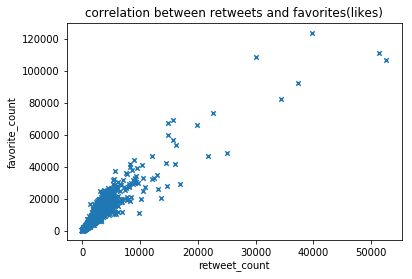

In [151]:
#scatter plot for retweet_count and favorite_count
scatter_plot('retweet_count','favorite_count')
title='correlation between retweets and favorites(likes)'

### Q3-What is the most common tweet source?

In [152]:
def plotbar(data, title=None,xlabel=None, ylabel=None):   
    ax = data.plot(kind='bar',figsize = (8,8),color = '#69b3a2',title=title, width=0.5, legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [153]:
wrd_mastercopy['source'].value_counts()

Twitter for iPhone    1178
Twitter Web Client      14
TweetDeck                4
Name: source, dtype: int64

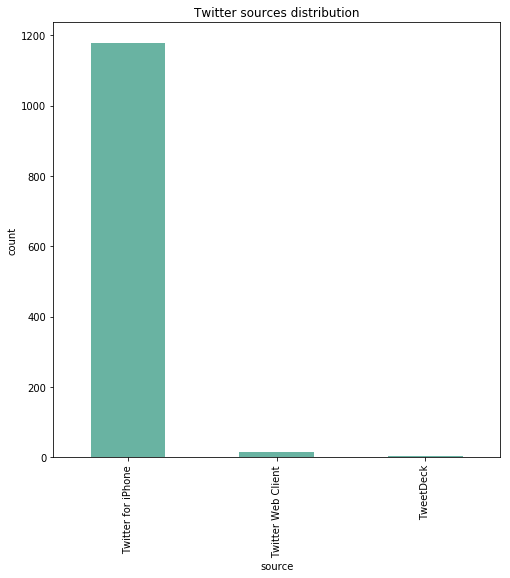

In [154]:
data=wrd_mastercopy['source'].value_counts()
title='Twitter sources distribution'
xlabel='source'
ylabel='count'

plotbar(data,title,xlabel, ylabel)

### Q4-Is there any relationship between tweet source and retweet_count as well as favorite_count?

A. source and favorite_count

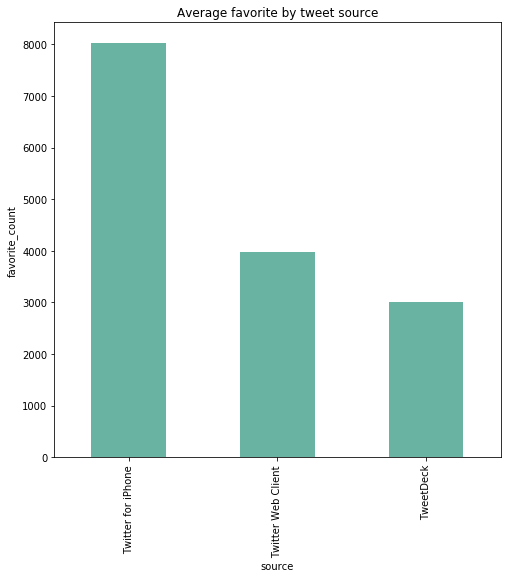

In [155]:
data=wrd_mastercopy.groupby('source')['favorite_count'].mean().sort_values(ascending=False)
title='Average favorite by tweet source'
xlabel='source'
ylabel='favorite_count'

plotbar(data,title,xlabel, ylabel)

B. source and retweet_count

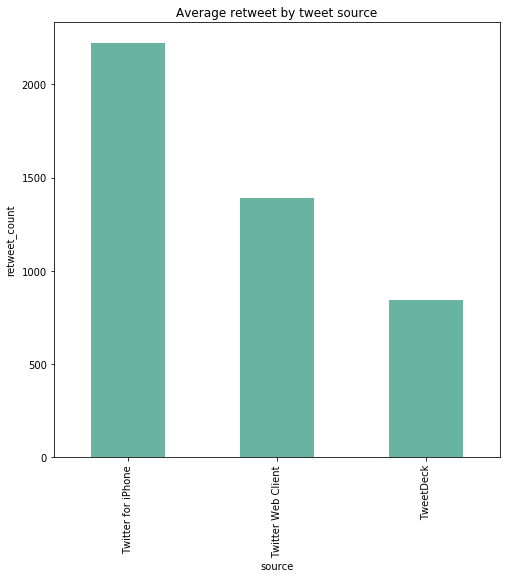

In [156]:
data=wrd_master.groupby('source')['retweet_count'].mean().sort_values(ascending=False)
title='Average retweet by tweet source'
xlabel='source'
ylabel='retweet_count'

plotbar(data,title,xlabel, ylabel)

### Q5-Day of the week with the highest tweet?

In [157]:
# To answer this, we will create a new column for the days of the week.

wrd_master['Day of Week'] = wrd_master['timestamp'].apply(lambda time: time.dayofweek)

In [158]:
wrd_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,prediction,dog_breed,confidence,retweet_count,favorite_count,Day of Week
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,5272,29222,1
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,13.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,3464,21978,0
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,7717,35182,5
3,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,1,Pomeranian,0.566142,15679,56669,4
4,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,12.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,1,Irish_terrier,0.487574,3604,24427,3


In [159]:
# Changing 'weekday' data type from int to str
wrd_master['Day of Week']  = wrd_master['Day of Week'].replace({0:'Monday', 1:'Tuesday', 
            2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'})

In [160]:
wrd_master['Day of Week'].value_counts()

Monday       200
Friday       176
Thursday     175
Wednesday    167
Tuesday      166
Sunday       164
Saturday     148
Name: Day of Week, dtype: int64

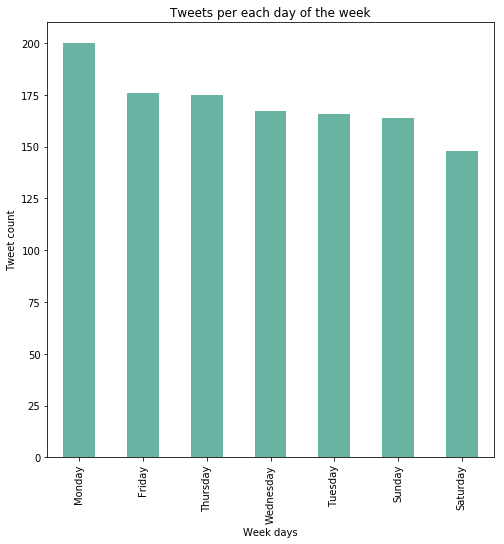

In [161]:
data=wrd_master.groupby('Day of Week')['tweet_id'].count().sort_values(ascending = False)
title='Tweets per each day of the week'
xlabel='Week days'
ylabel='Tweet count'

plotbar(data,title,xlabel, ylabel)

### Q6-Which dog_stage has the highest retweet and favorites?

A. Dog stage and retweet_count

In [162]:
#lets check the mean retweet count against dog stages
wrd_master.groupby('dog_stages')['retweet_count'].mean().sort_values(ascending=False)

dog_stages
doggo-puppo     16076.000000
puppo            5612.833333
doggo            5492.736842
floof            4280.166667
doggo-floof      2784.000000
pupper           2073.344538
doggo-pupper     2066.666667
Name: retweet_count, dtype: float64

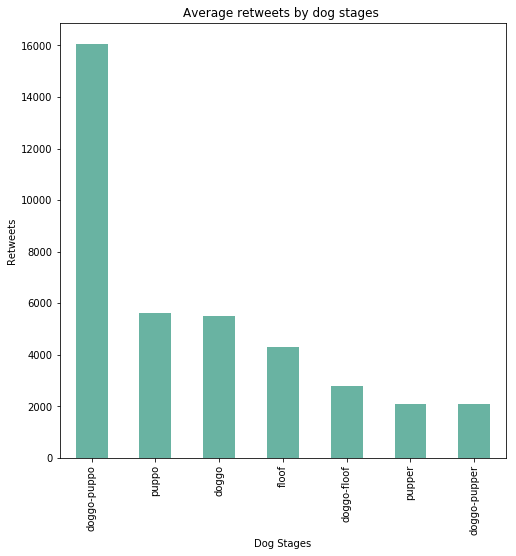

In [163]:
#visual representation of the above
data=wrd_master.groupby('dog_stages')['retweet_count'].mean().sort_values(ascending=False)
title='Average retweets by dog stages '
xlabel='Dog Stages'
ylabel='Retweets'

plotbar(data,title,xlabel, ylabel)

B. Dog stage and favorite_count

In [164]:
#lets check the mean favorite count against dog stages
wrd_master.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False)

dog_stages
doggo-puppo     41814.000000
puppo           21184.444444
doggo           16874.473684
doggo-floof     14801.000000
floof           12194.833333
doggo-pupper     7868.666667
pupper           7045.731092
Name: favorite_count, dtype: float64

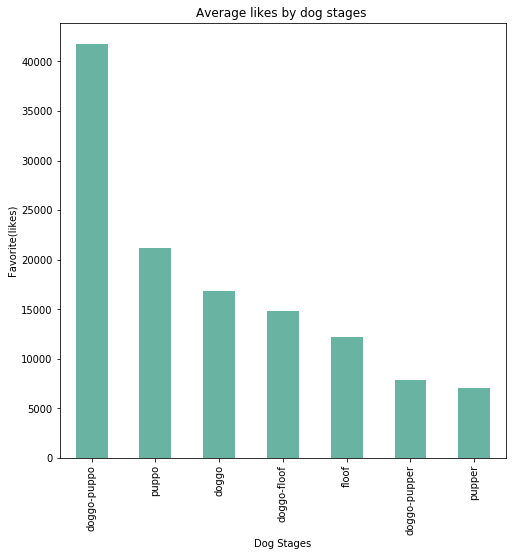

In [165]:
#visual representation of the above
data=wrd_master.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False)
title='Average likes by dog stages '
xlabel='Dog Stages'
ylabel='Favorite(likes)'

plotbar(data,title,xlabel, ylabel)

### Q7-Top 10 dog breeds based on tweet_count and favorite_count 

A. Dog breed and Total tweet count

In [166]:
def plotbarh(data, title=None,xlabel=None, ylabel=None):   
    ax = data.plot(kind='barh',figsize = (10,10),color = 'tomato',title=title, width=0.5, legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [167]:
#lets check the mean retweet count against dog stages
wrd_master.groupby('dog_breed')['tweet_id'].count().sort_values(ascending=False)[:10]

dog_breed
Golden_retriever      119
Pembroke               77
Labrador_retriever     73
Chihuahua              50
Pug                    39
Pomeranian             28
Malamute               26
Chow                   26
Toy_poodle             25
Samoyed                24
Name: tweet_id, dtype: int64

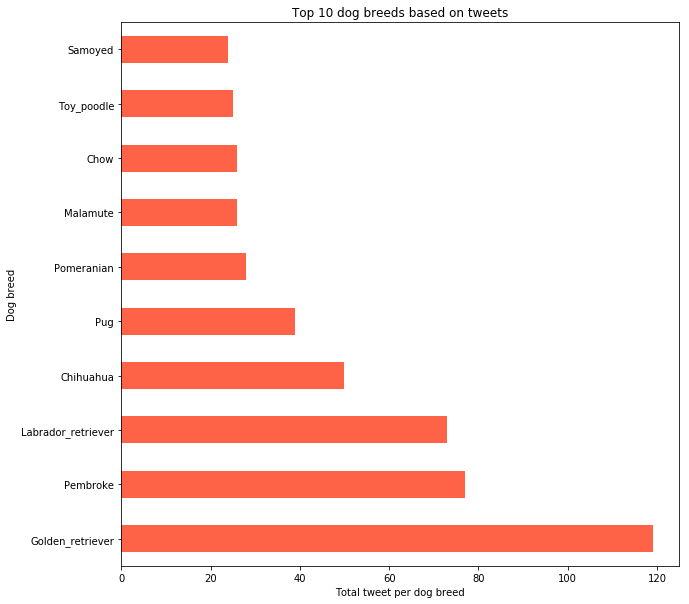

In [168]:
#visual representation of the above
data = wrd_master.groupby('dog_breed')['tweet_id'].count().sort_values(ascending=False)[:10]
title = "Top 10 dog breeds based on tweets"
xlabel = "Total tweet per dog breed"
ylabel = "Dog breed"

plotbarh(data,title, xlabel, ylabel)

In [169]:
#lets check the mean favorite count against dog breed
wrd_master.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False)[:10]

dog_breed
Golden_retriever      1243263
Pembroke               823663
Labrador_retriever     567910
Chihuahua              410549
French_bulldog         326996
Samoyed                288813
Chow                   256626
Cocker_spaniel         219185
Eskimo_dog             201577
Malamute               194452
Name: favorite_count, dtype: int64

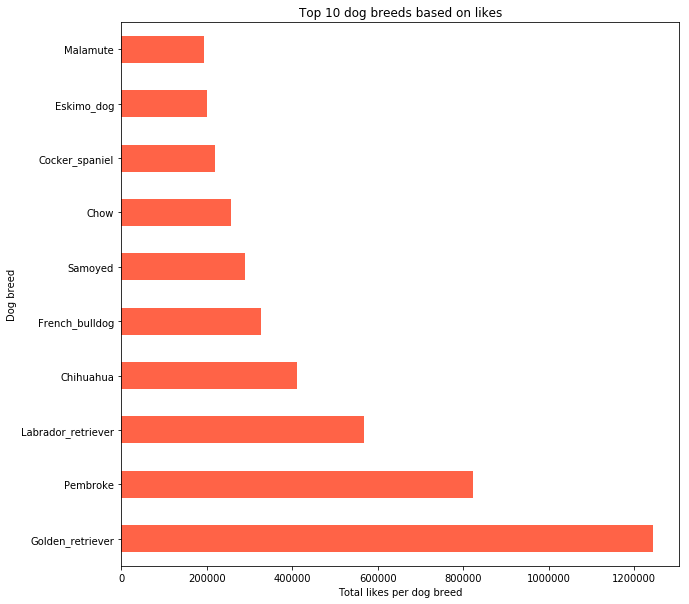

In [170]:
#visual representation of the above
data = wrd_master.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False)[:10]
title = "Top 10 dog breeds based on likes"
xlabel = "Total likes per dog breed"
ylabel = "Dog breed"

plotbarh(data,title, xlabel, ylabel)

### Insights: After Visualization
1. There is a strong positive correlation between retweet_count and favorite_count
2. The most common tweet source is 'Twitter for iphone', which also have the highest average retweet_count and favorite_count
3. From this dataset, the day with the highest number of tweets is Monday.
4. Top 3 dog stages with the highest retweets are doggo-puppo,puppo and doggo.
5. Top 3 dog stages with the highest likes are doggo-puppo,puppo and doggo. This is inline with the positive correlation between retweets and favorites.
6. Golden retriever is the most common and liked dog breed.